(created by Zsolt Elter)

# Numerical solution of the one-group diffusion equation

In realistic reactor calculations the analytical solution of the diffusion equation is usually not possible (for example due to the heterogenities in the reactor, such as fuel pellets, cladding, moderator channels, etc).

Thus the solution often requires numerical treatment. In this notebook we will explore a simple case, a homogenous slab reactor: for such system both analytical and numerical solution is possible, and can be compared.

Suppose we would like to solve 

$$-D\frac{d^2\phi}{dx^2}+\Sigma_a\phi(x)=S(x)$$

with boundary conditions

$$\phi(0)=\phi(a)=0$$

(let's ignore now the extrapolation length).

We can discretize the the spatial variable $x$ by choosing a set of $N+1$ discrete points ($x_0,x_1,...,x_i,...x_N$) which are equally spaced. The distance between the neigbouring points is $\Delta=a/N$.

If we wanted to rewrite the above diffusion equation at each discrete $x_i$ point in the form of difference equations, we need an approximation for the term $\frac{d^2\phi}{dx^2}$. We can Taylor expend $\phi$ at $x_{i\pm1}$:

$$\phi_{i+1}=\phi(x_{i+1})=\phi_i+\Delta\frac{d\phi}{dx}\Big\rvert_i+\frac{\Delta^2}{2}\frac{d^2\phi}{dx^2}\Big\rvert_i+...$$

and

$$\phi_{i-1}=\phi(x_{i-1})=\phi_i-\Delta\frac{d\phi}{dx}\Big\rvert_i+\frac{\Delta^2}{2}\frac{d^2\phi}{dx^2}\Big\rvert_i-...$$

Upon adding these one arrives to

$$\frac{d^2\phi}{dx^2}\Big\rvert_i\approx \frac{\phi_{i+1}-2\phi_i+\phi_{i-1}}{\Delta^2}$$

with that our diffusion equation becomes

$$-D\Bigg(\frac{\phi_{i+1}-2\phi_i+\phi_{i-1}}{\Delta^2}\Bigg)+\Sigma_a\phi_i=S_i \quad i=1,2,...$$

We can rearrange this

$$-\frac{D}{\Delta^2}\phi_{i-1}+\Big(\frac{2D}{\Delta^2}+\Sigma_a\Big)\phi_i-\frac{D}{\Delta^2}\phi_{i+1}=S_i$$

that is with some new constants

$$a_{i,i-1}\phi_{i-1}+a_{i,i}\phi_i-a_{i,i+1}\phi_{i+1}=S_i \quad i=1,2...,N-1$$

(we dont have equations for $i=0$ and $i=N$, since we have boundary conditions there, which actually present themself by the fact that in case of $i=1$ the $\phi_{i-1}$ disappears).

Now, one can see that this is a matrix multiplied with a vector, which results in a vector, in the form of

$$\underline{\underline{A}}\underline{\phi}=\underline{S}$$

where $\underline{\underline{A}}$ is made of the above defined coefficients:

\begin{equation*}
\begin{pmatrix}
a_{1,1} & a_{1,2} & 0 & 0 & 0 & \cdots \\
a_{2,1} & a_{2,2} & a_{2,3} & 0 & 0 & \cdots \\
0 & a_{3,2} & a_{3,3} & a_{3,4} & 0 & \cdots \\
0 & 0 & a_{4,3} & a_{4,4} & a_{4,5} & \cdots  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots &
\end{pmatrix}
\end{equation*}

and the vector $\underline{\phi}$ is simply the flux at the discrete locations

\begin{equation*}
\begin{pmatrix}
\phi_1 \\ \phi_2 \\ \phi_3 \\ \vdots \\ \phi_{N-2} \\ \phi_{N-1}
\end{pmatrix}
\end{equation*}

this is what we seek as the solution!

And $\underline{S}$ is the source at different locations. 

\begin{equation*}
\begin{pmatrix}
S_1 \\ S_2 \\ S_3 \\ \vdots \\ S_{N-2} \\ S_{N-1}
\end{pmatrix}
\end{equation*}

which is an input. For example we could have just a plane source (only one non-zero value).

Thus by inverting the matrix one can solve for the flux. 

$$\underline{\phi}=\underline{\underline{A}}^{-1}\underline{S}$$

The problem could be further developed by assuming that $D$ and $\Sigma_a$ also depend on the spatial coordinate. And the problem is similar in multiple dimensions. However for the current assignment we can consider the simplest case, with constant $D$ and $\Sigma_a$ in a finite one-dimensional geometry.

### Task 1

Review how matrices and vectors can be created with numpy.

In [1]:
import numpy as np

In [2]:
a=np.zeros(30)  #vector of zeros with 30 elements
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [3]:
b=np.array([1,2,3,4,5,6]) #vector with six elements
print(b)
print(b[3]) #the 3rd (starts with 0th) element of b

[1 2 3 4 5 6]
4


In [4]:
c=12*np.ones(30) #vector of ones with 30 elements multiplied by a constant
print(c)

[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]


In [5]:
A=np.zeros((5,5)) #5x5 matrix of zeros
print(A)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [6]:
A[1][3]=8 #assign value to the element in the first row and third column
print(A)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [7]:
B=np.array([[1,2,3,4],[5,6,7,8]]) #2x4 matrix
print(B)

[[1 2 3 4]
 [5 6 7 8]]


In [8]:
#create matrix with a for loop
C=np.zeros((10,10)) #initialize a 10x10 matrix with zeros
for i in range(10):
    if i<9:
        C[i][i]=3
        C[i][i+1]=2
    else:
        C[i][i]=3
print(C)

[[3. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]


In [9]:
#solve Ax=y type system
A=np.random.rand(10,10) #10x10 matrix with filled with random numbers
y=np.random.rand(10)    #10x1 vector with random numbers
x=np.linalg.solve(A,y)
print(x)

[-0.69978702  1.00546787 -0.17585612  0.59143771 -2.32828076  3.7453441
 -0.28240239  0.93334403 -2.8793743   0.5823894 ]


### Task 2

Solve for the flux in case of some simple sources. 

a, when the source is located in the middle of a slab (plane source)

b, when the source is uniform in the whole slab (eg. `S=100*np.ones(N)`)

$D=0.9\:\rm cm$, $\Sigma_a=0.066\: \rm cm^{-1}$, $a=100\: \rm cm$, $N=30$. However, you are encouraged to play with other values, for example, interesting to see how the flux looks like in a case, when the absorption cross section is very low.


Hint: you can use the `np.linalg.solve(A,S)` function once the matrix and the vector are constructed, as shown in the first task.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
a=100
D=0.9
Sigma_a=0.066
L=np.sqrt(D/Sigma_a)
B=np.sqrt(Sigma_a/D)
N=30

### Solution

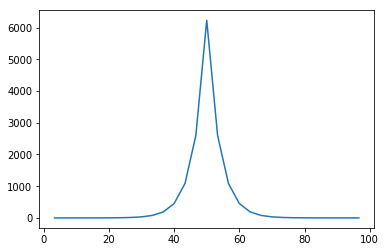

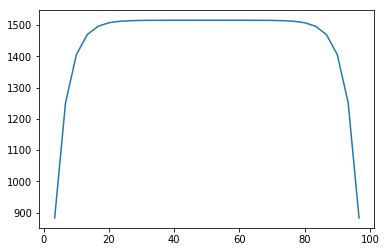

In [11]:
Delta=a/N
x=np.linspace(0,a,N+1)
A=np.zeros((N-1,N-1))
for i in range(1,N):
    if i==1:
        A[i-1][i-1]=2*D/Delta**2+Sigma_a
        A[i-1][i]=-D/Delta**2
    elif i==N-1:
        A[i-1][i-2]=-D/Delta**2
        A[i-1][i-1]=2*D/Delta**2+Sigma_a
    else:
        A[i-1][i-2]=-D/Delta**2
        A[i-1][i-1]=2*D/Delta**2+Sigma_a
        A[i-1][i]=-D/Delta**2

        
        
S=np.zeros(N-1)
S[14]=1000           #"plane" source

flux=np.linalg.solve(A,S)

plt.figure()
plt.plot(x[1:-1],flux)
plt.show()

S=np.zeros(N-1)
S=100*np.ones(N-1)  #constant source everywhere

flux=np.linalg.solve(A,S)

plt.figure()
plt.plot(x[1:-1],flux)
plt.show()

In [12]:
print(A)

[[ 0.228 -0.081  0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.081  0.228 -0.081  0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.081  0.228 -0.081  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.081  0.228 -0.081  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.081  0.228 -0.081  0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0